## Предсказать превышает ли доход конкретного человека 50.000$ в год, основываясь на данных переписи населения в США
https://archive.ics.uci.edu/ml/datasets/Adult

### Весь препроцессинг и деление данных на выборки скопированы из прошлой домашней работы

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml

In [2]:
data = pd.read_csv('adult.data')
test = pd.read_csv('adult.test')

In [3]:
# объединяем выборки
X = pd.concat([data, test], sort=False, axis=0, ignore_index=True)

In [4]:
# как можно заметить, последний столбец отражает какому классу принадлежит человек.
# Сделаем отдельный вектор столбцов и приведем его к виду 0 - <=50K, 1 - >50K

X['class'] = X['class'].apply(lambda x: '>50K' in x)
y = X['class'].copy()
# X.drop('class', axis=1, inplace=True)

In [5]:
# избавляюсь от пробелов в каждой ячейке таблицы
X = X.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# Датасет содержит в себе категориальные и числовые признаки
# Признаки и их значения:
for i in X.columns:
    if X[i].dtype == "object":
        print(i, ':', X[i].unique())
    else:
        print(i, ': number')

age : number
workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt : number
education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num : number
marital-status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex : ['Male' 'Female']
capital-gain : number
capital-loss : number
hours-per-wee

In [6]:
# проверим наличие пустых ячеек
X.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
class             False
dtype: bool

In [7]:
# как можно заметить, в категориальных столбцах присутствует значение '?', будем считать его пропущенным
# узнаем как часто он встречается в каждом из столбцов
for i in X.columns:
    if X[i].dtype =="object":
        if '?' in X[i].value_counts():
            print(i)
            print(X[i].value_counts()['?'] / X[i].value_counts().sum() * 100)

workclass
5.7307235575938735
occupation
5.751197739650301
native-country
1.7546374022357807


In [8]:
X.loc[X['workclass'] == '?', 'workclass'] = X['workclass'].mode().iloc[0]
X.loc[X['occupation'] == '?', 'occupation'] = X['occupation'].mode().iloc[0]
X.loc[X['native-country'] == '?', 'native-country'] = X['native-country'].mode().iloc[0]

In [9]:
X.drop('fnlwgt', inplace=True, axis=1)

In [10]:
to_delete = []
for column in X.columns:
    if X[column].dtype != "object":
        continue
    to_delete.append(column)
print(to_delete)

for i in to_delete:
    X_process = pd.get_dummies(X[i])
    X = pd.concat((X, X_process), axis=1)
    X = X.drop(i, axis=1)
X.drop('class', inplace=True, axis=1)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [11]:
# normalization
from sklearn.preprocessing import MinMaxScaler

col = []
for column in X.columns:
    if X[column].dtype not in ["object", "bool"]:
        col.append(column)
X[col] = MinMaxScaler().fit_transform(X[col].values)
X.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,...,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.296487,0.605206,0.010791,0.020088,0.402269,0.029319,0.064207,0.000205,0.751505,0.034704,...,0.001372,0.003767,0.000430,0.002355,0.001331,0.000614,0.000553,0.914971,0.001761,0.000471
std,0.187815,0.171398,0.074521,0.092517,0.126443,0.168701,0.245124,0.014307,0.432145,0.183030,...,0.037012,0.061263,0.020731,0.048467,0.036457,0.024776,0.023506,0.278928,0.041925,0.021695
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.273973,0.600000,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.424658,0.733333,0.000000,0.000000,0.448980,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Разобьем данные на обучающую (65%) и тестовую (35%) выборки:

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42, stratify=y)

### Подбор гиперпараметров
#### В качестве солвера берем Adam
#### В качестве функции активации - ReLu

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

#### Однослойная сеть

In [14]:
hidden_layer_size = np.linspace(1, 100, 25)
hidden_layer_size = hidden_layer_size.astype(int)
test_err, train_err = [], []

for size in tqdm(hidden_layer_size):
    model = MLPClassifier(hidden_layer_sizes=(size), 
                          solver='adam',
                          activation='relu',
                          max_iter=1000,
                          random_state=777)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

100%|██████████| 25/25 [17:13<00:00, 41.34s/it]


Train: Min error=0.11197908463791854, number of neurons=79
Test: Min error=0.1454226381983036, number of neurons=5


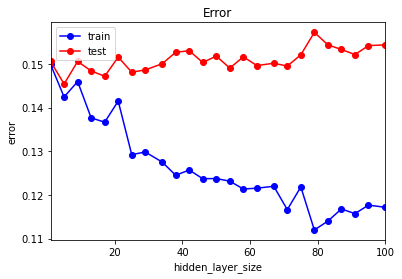

In [16]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()

print(f'Train: Min error={np.min(train_err)}, number of neurons={hidden_layer_size[np.argmin(train_err)]}')
print(f'Test: Min error={np.min(test_err)}, number of neurons={hidden_layer_size[np.argmin(test_err)]}')

#### Двуслойная сеть

In [30]:
N = 5
sizes = np.linspace(1, 100, N).astype(int)
test_err = np.zeros((N, N))
train_err = np.zeros((N, N))

for i, size_1 in enumerate(tqdm(sizes)):
    for j, size_2 in enumerate(sizes):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2), 
                              solver='adam',
                              activation='relu',
                              max_iter=1000,
                              random_state=777)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

100%|██████████| 5/5 [32:18<00:00, 387.61s/it]


In [31]:
train_min_loss = np.where(train_err == np.min(train_err))
test_min_loss = np.where(test_err == np.min(test_err))

print(f'Train: Min error={np.min(train_err)}, number of neurons={sizes[train_min_loss[0][0]]},{sizes[train_min_loss[1][0]]}')
print(f'Test: Min error={np.min(test_err)}, number of neurons={sizes[test_min_loss[0][0]]},{sizes[test_min_loss[1][0]]}')

Train: Min error=0.0858663810753772, number of neurons=75,100
Test: Min error=0.14846446329336063, number of neurons=1,75


#### Как можно видеть, самый маленький результат ошибки на тестовой выборке достигается в однослойной сети при 5 нейронах. Из этого можно сделать вывод о том, что задача в принципе некорректна для решения нейронной сетью. ИЛИ требуется более серьезный препроцессинг данных. По моему мнению, ключевая проблема в том, что классы распределены неравномерно, то есть при выравнивании классов картина может измениться в лучшую сторону.

### Подбор параметра регуляризации

#### Однослойная сеть

In [32]:
alphas = np.logspace(-5, 5, 50)
test_err, train_err = [], []

for alpha in tqdm(alphas):
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (5), 
                              solver='adam', activation='relu', max_iter=1000, random_state=777)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

100%|██████████| 50/50 [09:23<00:00, 11.26s/it]


Train: Min error=0.14133618924622798, alpha=0.0071968567300115215
Test: Min error=0.14489616847031295, alpha=0.018420699693267165


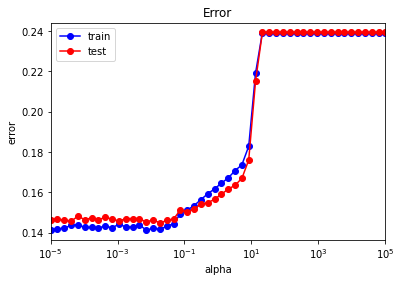

In [33]:
plt.semilogx(alphas, train_err, 'b-o', label = 'train')
plt.semilogx(alphas, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.title('Error')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

print(f'Train: Min error={np.min(train_err)}, alpha={alphas[np.argmin(train_err)]}')
print(f'Test: Min error={np.min(test_err)}, alpha={alphas[np.argmin(test_err)]}')

#### Двуслойная сеть

In [34]:
alphas = np.logspace(-5, 5, 50)
test_err, train_err = [], []

for alpha in tqdm(alphas):
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (1, 75), 
                              solver='adam', activation='relu', max_iter=1000, random_state=777)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

100%|██████████| 50/50 [06:43<00:00,  8.07s/it]


Train: Min error=0.14880146155542257, alpha=0.002811768697974231
Test: Min error=0.14758701374670957, alpha=0.19306977288832497


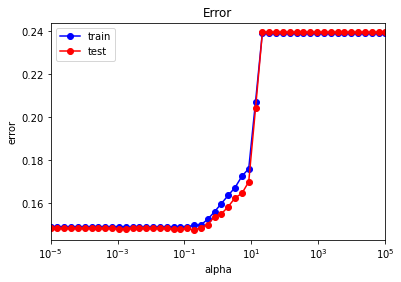

In [35]:
plt.semilogx(alphas, train_err, 'b-o', label = 'train')
plt.semilogx(alphas, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.title('Error')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

print(f'Train: Min error={np.min(train_err)}, alpha={alphas[np.argmin(train_err)]}')
print(f'Test: Min error={np.min(test_err)}, alpha={alphas[np.argmin(test_err)]}')

#### Лучшая модель

In [36]:
model = MLPClassifier(alpha = 0.018420699693267165, hidden_layer_sizes = (5), 
                      solver='adam', activation='relu', max_iter=1000, random_state=777)

### Матрица рассогласования

C:\Users\User\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


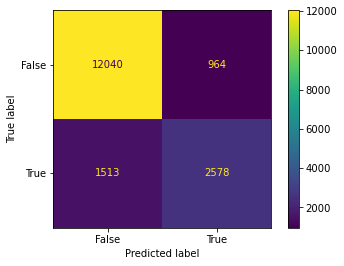

In [38]:
from sklearn.metrics import plot_confusion_matrix

model.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test) 

#### Выводы
##### Использование нейронной сети не дало явных преимуществ по сравнению с использованным в первой домашней работе kNN. Проблема заключается в явном преобладании нулевого класса (76%)
##### Тем не менее были выбраны оптимальные гиперпараметры для однослойной и двуслойной нейронных сетей.
##### Однослойная - 5 нейронов, альфа = 0.0184, ошибка на тестовой выборке - 0.14489
##### Двуслойная - (1, 75), альфа = 0.193, ошибка на тестовой выборке - 0.1475
##### Заметим, что с ростом коэффициента регуляризации растет ошибка, что говорит о том, что после обучения у модели не возникает больших значения весовых коэффициентов, а значит нет переобучения.